<a href="https://colab.research.google.com/github/carlo-coding/curso_deep_learning/blob/main/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regresión lineal
La forma de lograr que una ecucación lineal encaje en los datos de la mejor manera es minimizando el error modificando m y b en la ecuación de la recta:
<br />
<i>y = mx + b</i>

La forma de cálcular el error es por medio de la formula del error cuadratico medio. Se trata hacer una sumatoria de cada punto restandole la predicción de la ecuación linear en ese punto, elevandola al cuadrado y dividiendo toda esta suma por el numero de puntos.
<br />
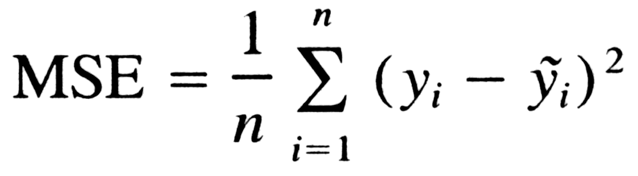

El objetivo es minimizar esta función de error por medio de la manipulación de m y b. Por lo tanto debemos calcular la derivada parcial de la función de error con respecto a m y la otra derivada parcial con respecto a b.
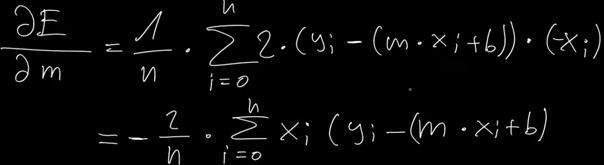

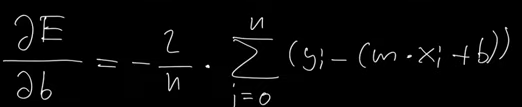

Como las derivadas parciales nos dicen la dirección de a donde ir para hacer crecer el error lo unico de debemos hacer es ir en la dirección opuesta, actualizamos tanto m como b restandoles sus derivadas parciales multiplicadas por un learning rate

In [108]:
# Cargar dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./study_data.csv")
df.head(3)

,study_time,score
0,26.772200,72.463087
1,24.819947,71.505867
2,7.704199,60.820380


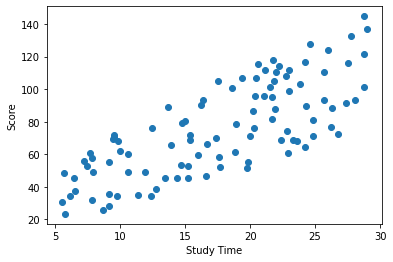

In [117]:
# Mostramos los datos
study_time = df["study_time"].values
score = df["score"].values
plt.scatter(study_time, score)
plt.xlabel("Study Time")
plt.ylabel("Score")
plt.show()

Error in epoch 0: 5698.243546926075
Error in epoch 50: 383.9036840164171
Error in epoch 100: 380.5760140610192
Error in epoch 150: 380.45671292293247
Error in epoch 200: 380.33964848516194
Error in epoch 250: 380.22288335156486


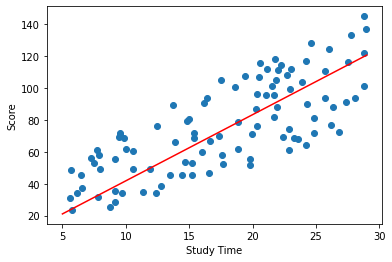

In [123]:
def loss_function(m, b, points):
  total_error = 0
  n = len(points)
  for i in range(n):
    x = points.iloc[i].study_time
    y = points.iloc[i].score

    total_error += (y - (x*m + b)) ** 2

  total_error /= float(n)

  return total_error

def gradient_descent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0

  n = len(points)
  for i in range(n):
    x = points.iloc[i].study_time
    y = points.iloc[i].score

    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))

  m = m_now - L*m_gradient
  b = b_now - L*b_gradient

  return m, b

m = 0
b = 0
L = 0.0001
EPOCHS = 300

for i in range(EPOCHS):
  m, b = gradient_descent(m, b, df, L)
  if i%50 == 0:
    error = loss_function(m, b, df)
    print(f"Error in epoch {i}: {error}")

plt.scatter(study_time, score)
plt.plot(list(range(5, 30)), [m*x + b for x in range(5, 30)], color="red")
plt.xlabel("Study Time")
plt.ylabel("Score")
plt.show()
